In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols
from astsadata import *

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [2]:
def acf1(x, nlags=None, acf_type="correlation", pacf=False, ax=None, **kwargs):
    lags = np.arange(1, nlags + 1)

    if pacf:
        if acf_type == "correlation":
            values = sm.tsa.pacf(x, nlags=nlags)[1:]
            ylabel = "PACF"
    else:
        if acf_type == "correlation":
            values = sm.tsa.acf(x, nlags=nlags, fft=False)[1:]
            ylabel = "ACF"
        elif acf_type == "covariance":
            values = sm.tsa.acovf(x, nlag=nlags)[1:]
            ylabel = "ACoV"

    if ax is None:
        ax = plt.gca()
 
    ax.bar(lags, values, **kwargs)
    ax.axhline(0, color="black", linewidth=1)
    if acf_type == "correlation":
        conf_level = 1.96 / np.sqrt(x.shape[0])
        ax.axhline(conf_level, color="red", linestyle="--", linewidth=1)
        ax.axhline(-conf_level, color="red", linestyle="--", linewidth=1)
    ax.set_xlabel("LAG")
    ax.set_ylabel(ylabel)

    return ax

# 2.1 Classical Regression in the Time Series Context

                            OLS Regression Results                            
Dep. Variable:                chicken   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     1974.
Date:                Tue, 18 May 2021   Prob (F-statistic):           2.83e-98
Time:                        12:16:45   Log-Likelihood:                -532.83
No. Observations:                 180   AIC:                             1070.
Df Residuals:                     178   BIC:                             1076.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -54.5682      3.176    -17.184      0.0

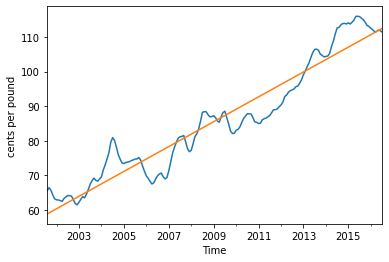

In [3]:
# Example 2.1
time = pd.Series([idx.ordinal for idx in chicken.index], index=chicken.index)
data_reg = pd.concat([time, chicken], axis=1)
data_reg.columns = ["time", "chicken"]

fit = ols(formula="chicken ~ time", data=data_reg).fit()
print(fit.summary())

ax = chicken.plot(xlabel="Time", ylabel="cents per pound", legend=False)
ax.plot(data_reg.index, fit.params.Intercept + fit.params.time * time)
plt.show()

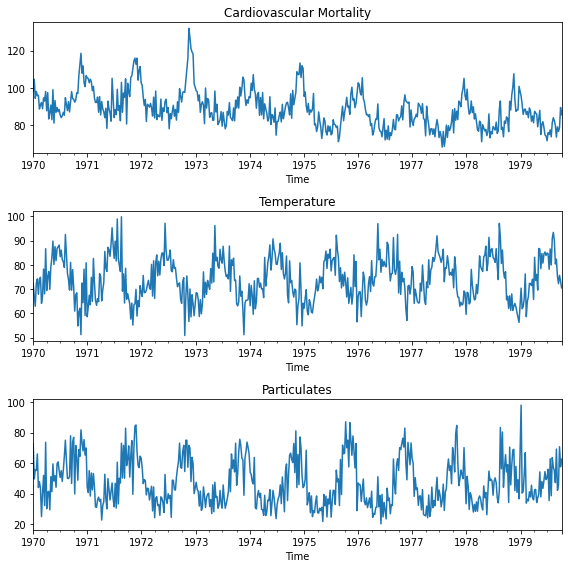

In [4]:
# Example 2.2
fig, axes = plt.subplots(nrows=3, figsize=(8, 8))

cmort.plot(ax=axes[0], xlabel="Time", title="Cardiovascular Mortality", legend=False)
tempr.plot(ax=axes[1], xlabel="Time", title="Temperature", legend=False)
part.plot(ax=axes[2], xlabel="Time", title="Particulates", legend=False)

fig.tight_layout()
plt.show()

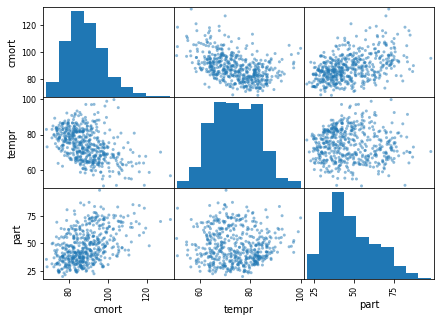

In [5]:
pairs = pd.concat([cmort, tempr, part], axis=1)
pairs.columns = ["cmort", "tempr", "part"]

pd.plotting.scatter_matrix(pairs, figsize=(7, 5))
plt.show()

In [6]:
# Regression
temp = tempr - tempr.mean() # center temperature
temp2 = temp.pow(2) # square it
trend = pd.Series([idx.ordinal for idx in cmort.index], index=cmort.index) # time

X = pd.concat([cmort, temp, temp2, trend, part], axis=1)
X.columns = ["cmort", "temp", "temp2", "trend", "part"]

fit = ols(formula="cmort ~ trend + temp + temp2 + part", data=X).fit()

print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  cmort   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     185.1
Date:                Tue, 18 May 2021   Prob (F-statistic):           2.20e-97
Time:                        12:16:47   Log-Likelihood:                -1660.1
No. Observations:                 508   AIC:                             3330.
Df Residuals:                     503   BIC:                             3351.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.5931      1.102     74.032      0.0

In [7]:
print(sm.stats.anova_lm(fit)) # ANOVA table

             df        sum_sq       mean_sq           F        PR(>F)
trend       1.0  10673.289494  10673.289494  261.791867  1.035893e-47
temp        1.0   8605.746543   8605.746543  211.079673  3.472363e-40
temp2       1.0   3427.085491   3427.085491   84.058725  1.227231e-18
part        1.0   7473.199730   7473.199730  183.300838  7.874638e-36
Residual  503.0  20507.377403     40.770134         NaN           NaN


In [8]:
num = cmort.shape[0] # sample size
print(fit.aic/num - np.log(2 * np.pi)) # AIC
print(fit.bic/num - np.log(2 * np.pi)) # BIC

AICc = np.log(np.sum(fit.resid ** 2)/num) + (num + 5)/(num - 5 - 2) # AICc
print(AICc)

4.717743565480401
4.7593821624053865
4.722010621918706


In [9]:
# Example 2.3
fish = pd.concat([rec, soi.shift(6)], axis=1).dropna()
fish.columns = ["rec", "soiL6"]
fit = ols(formula="rec ~ soiL6", data=fish).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    rec   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     253.5
Date:                Tue, 18 May 2021   Prob (F-statistic):           1.68e-45
Time:                        12:16:47   Log-Likelihood:                -2024.9
No. Observations:                 447   AIC:                             4054.
Df Residuals:                     445   BIC:                             4062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.7898      1.088     60.469      0.0

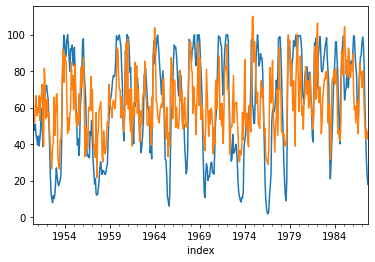

In [10]:
fish["rec"].plot(xlabel="Time")
fit.fittedvalues.plot()
plt.show()

# 2.2 Exploratory Data Analysis

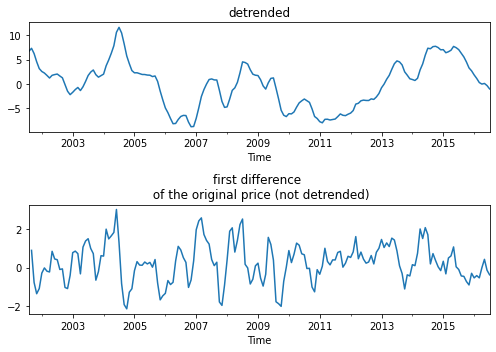

In [11]:
# Example 2.4 and 2.5
time = pd.Series([idx.ordinal for idx in chicken.index], index=chicken.index)
data_reg = pd.concat([time, chicken], axis=1)
data_reg.columns = ["time", "chicken"]

fit = ols(formula="chicken ~ time", data=data_reg).fit()

fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
fit.resid.plot(ax=axes[0], xlabel="Time", title="detrended")
chicken.diff().plot(ax=axes[1], xlabel="Time", 
                    title="first difference \n of the original price (not detrended)",
                    legend=False)
fig.tight_layout()
plt.show()

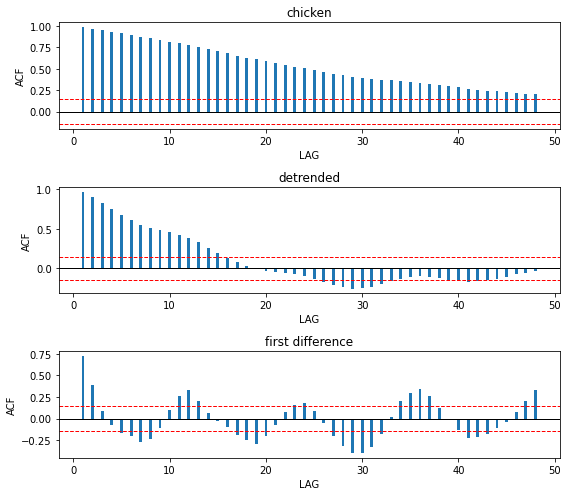

In [12]:
fig, axes = plt.subplots(nrows=3, figsize=(8, 7))

acf1(chicken, nlags=48, ax=axes[0], width=.3)
axes[0].set_title("chicken")

acf1(fit.resid, nlags=48, ax=axes[1], width=.3)
axes[1].set_title("detrended")

acf1(chicken.diff().dropna(), nlags=48, ax=axes[2], width=.3)
axes[2].set_title("first difference")

fig.tight_layout()
plt.show()

value    0.007926
dtype: float64


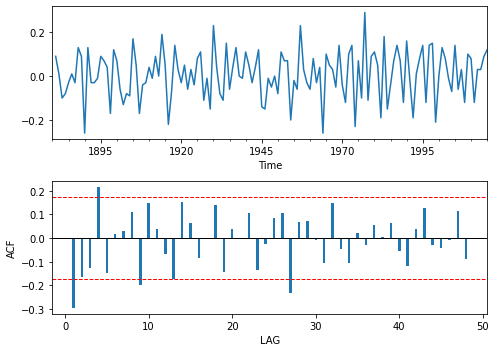

In [13]:
# Example 2.6
print(globtemp.diff().mean())

fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
globtemp.diff().plot(ax=axes[0], xlabel="Time", legend=False)

acf1(gtemp.diff().dropna(), nlags=48, ax=axes[1], width=.3)

fig.tight_layout()
plt.show()

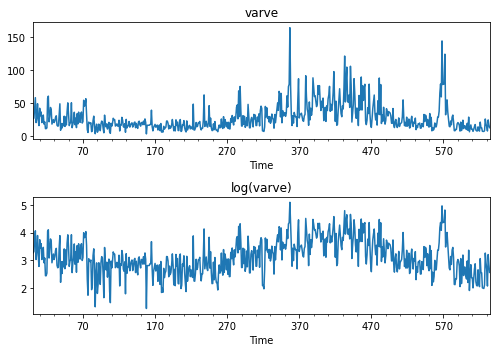

In [14]:
# Example 2.7
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
varve.plot(ax=axes[0], title="varve", xlabel="Time", legend=False)
varve.apply(np.log).plot(ax=axes[1], title="log(varve)", xlabel="Time", legend=False)
fig.tight_layout()
plt.show()

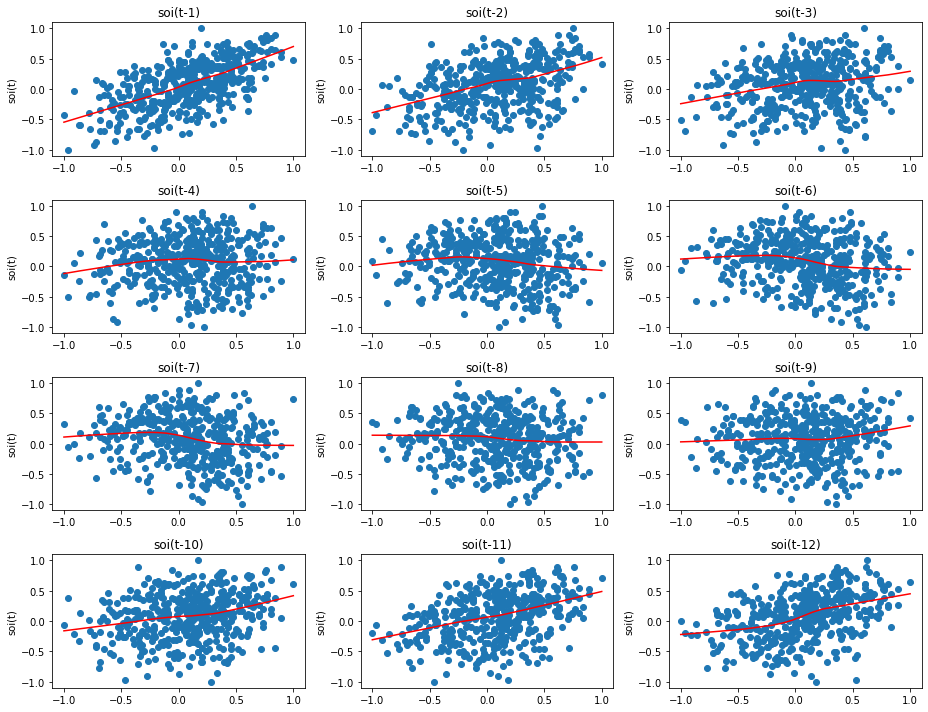

In [15]:
# Example 2.8
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(13, 10))

lag = 1
for row in range(4):
    for col in range(3):
        lowess = sm.nonparametric.lowess(soi.iloc[:, 0], soi.iloc[:, 0].shift(lag))
        pd.plotting.lag_plot(soi, lag=lag, ax=axes[row, col])
        axes[row, col].set_title(f"soi(t-{lag})")
        axes[row, col].set_ylabel("soi(t)")
        axes[row, col].set_xlabel("")
        axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
        lag += 1

fig.tight_layout()
plt.show()

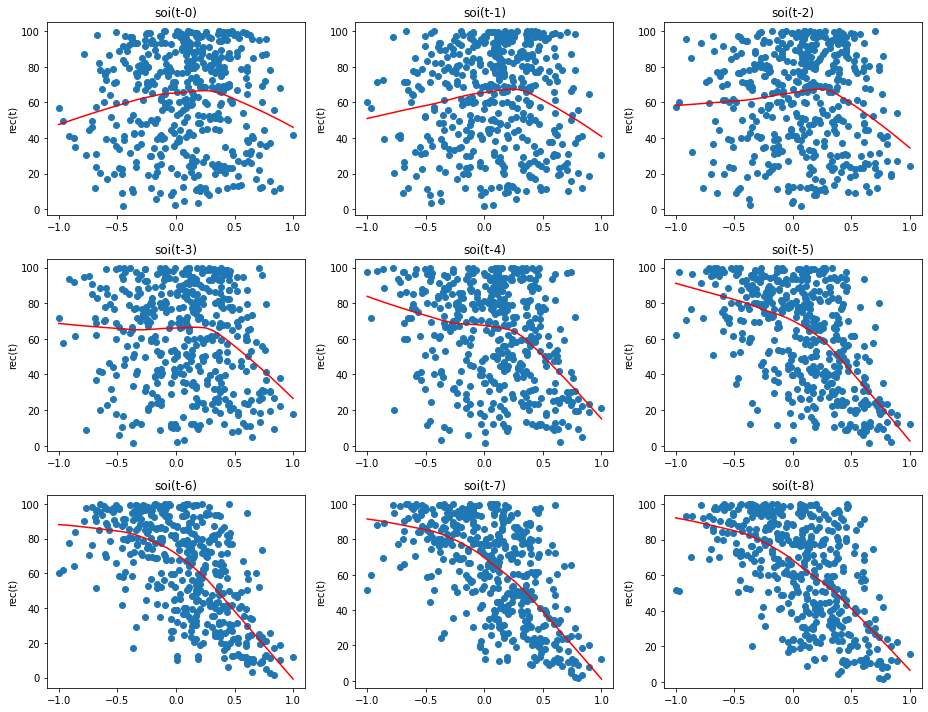

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))

lag = 0
for row in range(3):
    for col in range(3):
        lowess = sm.nonparametric.lowess(rec.iloc[:, 0], soi.iloc[:, 0].shift(lag))
        axes[row, col].scatter(soi.shift(lag), rec)
        axes[row, col].set_title(f"soi(t-{lag})")
        axes[row, col].set_ylabel("rec(t)")
        axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
        lag += 1

fig.tight_layout()
plt.show()

In [17]:
dummy = pd.Series(np.where(soi.iloc[:, 0] < 0, 0, 1), index=soi.index)
fish = pd.concat([rec, soi.shift(6), dummy.shift(6)], axis=1).dropna()
fish.columns = ["rec", "soiL6", "dL6"]

fit = ols("rec ~ soiL6 * dL6", data=fish).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    rec   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     99.43
Date:                Tue, 18 May 2021   Prob (F-statistic):           3.20e-49
Time:                        12:16:52   Log-Likelihood:                -2010.7
No. Observations:                 447   AIC:                             4029.
Df Residuals:                     443   BIC:                             4046.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     74.4794      2.865     25.998      0.0

<ipython-input-18-9efbf1382012>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r+" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fish["soiL6"], fit.fittedvalues, "r+", color="orange")


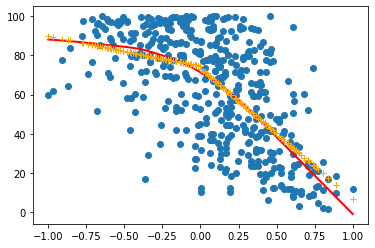

In [18]:
lowess = sm.nonparametric.lowess(fish["rec"], fish["soiL6"])

plt.scatter(fish["soiL6"], fish["rec"])
plt.plot(lowess[:, 0], lowess[:, 1], color="red", linewidth=2)
plt.plot(fish["soiL6"], fit.fittedvalues, "r+", color="orange")
plt.show()

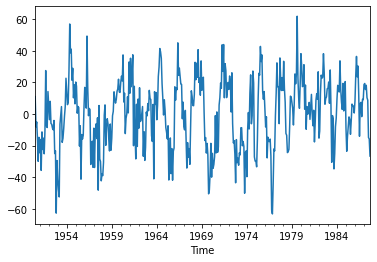

In [19]:
fit.resid.plot(xlabel="Time")
plt.show()

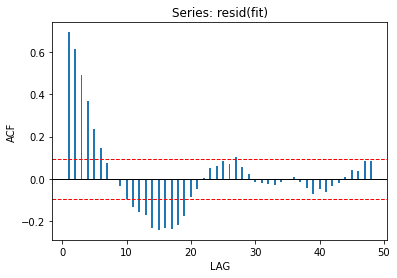

In [20]:
ax = acf1(fit.resid, nlags=48, width=.3)
ax.set_title("Series: resid(fit)")
plt.show()

In [21]:
# Example 2.10
np.random.seed(1000) # so you can reproduce the results
data_reg = pd.DataFrame({"x": 2 * np.cos(2 * np.pi * np.arange(1, 501)/50 + .6 * np.pi) + np.random.normal(size=500),
                         "z1": np.cos(2 * np.pi * np.arange(1, 501)/50),
                         "z2": np.sin(2 * np.pi * np.arange(1, 501)/50)})
fit = ols("x ~ 0 + z1 + z2", data=data_reg).fit()
print(fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      x   R-squared (uncentered):                   0.678
Model:                            OLS   Adj. R-squared (uncentered):              0.676
Method:                 Least Squares   F-statistic:                              523.5
Date:                Tue, 18 May 2021   Prob (F-statistic):                   3.69e-123
Time:                        12:16:53   Log-Likelihood:                         -709.97
No. Observations:                 500   AIC:                                      1424.
Df Residuals:                     498   BIC:                                      1432.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

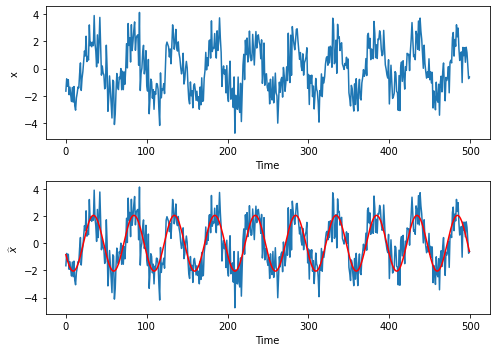

In [22]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
data_reg["x"].plot(ax=axes[0], xlabel="Time", ylabel="x")
data_reg["x"].plot(ax=axes[1], xlabel="Time", ylabel="x")
fit.fittedvalues.plot(ax=axes[1], color="red", xlabel="Time", ylabel=r"$\widehat{x}$")
fig.tight_layout()
plt.show()

# 2.3 Smoothing in the Time Series Context

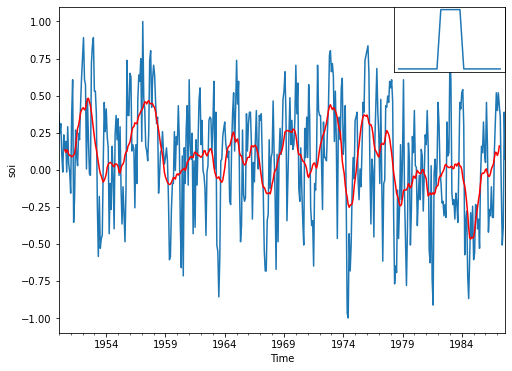

In [23]:
# Example 2.11
wgts = np.array([.5, *np.repeat(1, 11), .5])/12
soif = sm.tsa.filters.convolution_filter(soi.values.ravel(), filt=wgts, nsides=2)

fig, axes = plt.subplots(figsize=(8, 6))
soi.plot(ax=axes, xlabel="Time", ylabel="soi", legend=False)
plt.plot(soi.index, soif, color="red")

nwgts = np.array([*np.repeat(0, 21), *wgts, *np.repeat(0, 20)])

axin = axes.inset_axes([.75, .8, .25, .2])
axin.get_xaxis().set_ticks([])
axin.get_yaxis().set_ticks([])
axin.plot(nwgts)
plt.show()

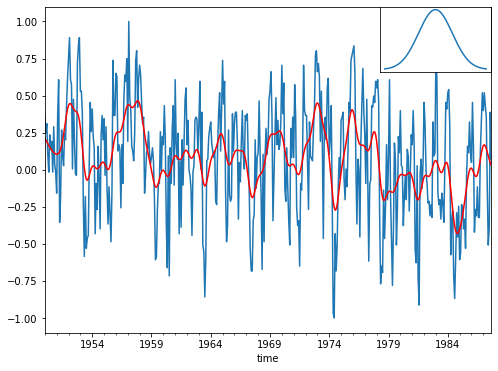

In [24]:
# Example 2.12
time = [idx.ordinal for idx in soi.index]
fit = sm.nonparametric.KernelReg(soi.values.ravel(), time, "c", "lc", [4]).fit(time)

fig, axes = plt.subplots(figsize=(8, 6))
soi.plot(ax=axes, legend=False, xlabel="time")
plt.plot(soi.index, fit[0], color="red")

# Working on inset picture of Gaussian density
x = np.arange(-3, 3.001, .001)
gauss = 1/np.sqrt(2 * np.pi) * np.exp(-(x**2)/2)

axin = axes.inset_axes([.75, .8, .25, .2])
axin.get_xaxis().set_ticks([])
axin.get_yaxis().set_ticks([])
axin.plot(gauss)
plt.show()
plt.show()

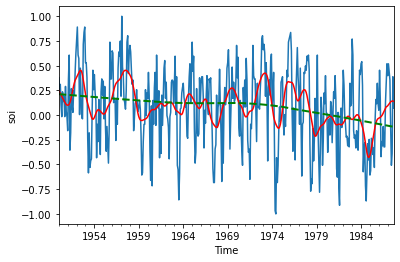

In [25]:
# Example 2.13
time = [idx.ordinal for idx in soi.index]
lowess_1 = sm.nonparametric.lowess(soi.values.ravel(), time, frac=.05)[:, 1]
lowess_2 = sm.nonparametric.lowess(soi.values.ravel(), time)[:, 1]

soi.plot(legend=False, xlabel="Time", ylabel="soi")
plt.plot(soi.index, lowess_1, color="red")
plt.plot(soi.index, lowess_2, color="green", linestyle="--", linewidth=2)
plt.show()

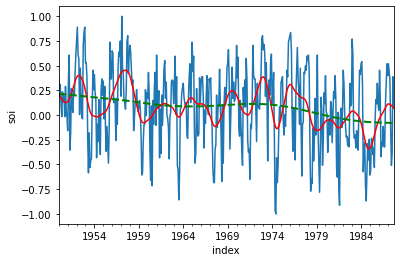

In [26]:
# Example 2.14
r_x = robjects.FloatVector([idx.ordinal for idx in soi.index])
r_y = robjects.FloatVector(soi.values.ravel())

r_smooth_spline = robjects.r['smooth.spline'] # extract R function

spline_1 = r_smooth_spline(x=r_x, y=r_y, spar=.5) # run smoothing function
spline_1_y = pd.Series(np.array(spline_1.rx2("y")), index=soi.index)

spline_2 = r_smooth_spline(x=r_x, y=r_y, spar=1)
spline_2_y = pd.Series(np.array(spline_2.rx2("y")), index=soi.index)

soi.plot(legend=False, xlabel="Time", ylabel="soi")
spline_1_y.plot(color="red")
spline_2_y.plot(color="green", linestyle="--", linewidth=2)
plt.show()

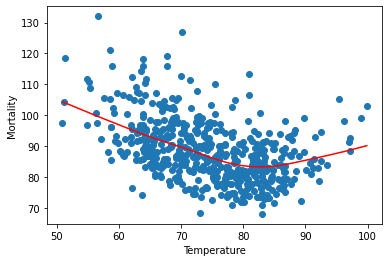

In [27]:
# Example 2.15
lowess = sm.nonparametric.lowess(cmort.values.ravel(), tempr.values.ravel())

plt.scatter(tempr, cmort)
plt.plot(lowess[:, 0], lowess[:, 1], color="red")
plt.xlabel("Temperature")
plt.ylabel("Mortality")
plt.show()